In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   # for heatmap
from my_functions import *
import re

In [2]:
data2 = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data2 = clean_data(data2)
# contar por municipio cuando barrio es sin informacion
total = data2[data2["BARRIO"] == "sin información"].groupby("MUNICIPIO").size()
print(total)


c:\Users\BRAYAN\Desktop\BootCamp\Prueba\Project_BootCamp\homework\my_functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip().str.lower()


MUNICIPIO
barbosa       104
bello        4422
caldas        173
envigado        5
itagui      17464
medellín      142
sabaneta     5248
dtype: int64


In [3]:
# Load the data
data = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data = clean_data(data)
#se eliminan los barrios sin información, ya que "BARRIO" es un parametro para el modelo
data = delete_barrios_sin_info(data)
data["HORA24"] = data["HORA"].apply(convertir_hora)
data


c:\Users\BRAYAN\Desktop\BootCamp\Prueba\Project_BootCamp\homework\my_functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip().str.lower()


,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO,HORA24
0,79.0,barbosa,03/01/2015,01:00:00 pm,sabado,choque,via bello hatillo km16+200,heridos,el hatillo,sin información,tramo de via,13
1,79.0,barbosa,07/01/2015,03:00:00 pm,miercoles,choque,hatillo-bello km 18+00,heridos,parque principal,sin información,tramo de via,15
2,79.0,barbosa,04/01/2015,04:01:00 am,domingo,choque,km 16+395 metros barbosa-hatillo,heridos,via el hatillo-cisneros,sin información,tramo de via,4
3,79.0,barbosa,05/01/2015,12:00:00 pm,lunes,choque,bello- don matias km 9+600,heridos,el hatillo,sin información,tramo de via,12
4,79.0,barbosa,11/01/2015,01:30:00 pm,domingo,choque,los abuelos,daños,parque principal,sin información,tramo de via,13
...,...,...,...,...,...,...,...,...,...,...,...,...
194555,1.0,medellín,22/05/2015,7:35:00,viernes,atropello,cl 65 cr 77 49,muertos,san germán,robledo,sin información,7
194556,1.0,medellín,22/05/2015,14:30:00,viernes,atropello,cl 48 cr 4 131,muertos,barrio de jesús,buenos aires,sin información,14
194557,1.0,medellín,22/05/2015,20:15:00,viernes,atropello,cr 55 cl 64,muertos,jesús nazareno,la candelaria,sin información,20
194558,1.0,medellín,25/05/2015,0:58:00,lunes,atropello,cl 44 cr 60 40,muertos,corazón de jesús,la candelaria,sin información,0


In [4]:
# Algunas fechas vienen tipo DD/MM/YYYY y otras tipo MM/DD/YYYY
dia = data["FECHA"].apply(lambda x: int(re.findall(r"^\d{1,2}", x)[0]) if re.findall(r"^\d{1,2}", x) else 0)
mes = data["FECHA"].apply(lambda x: int(re.findall(r"/(\d{1,2})/", x)[0]) if re.findall(r"/(\d{1,2})/", x) else 0)
data["AÑO"] = data["FECHA"].apply(lambda x: int(re.findall(r"(\d{4})$", x)[0]) if re.findall(r"(\d{4})$", x) else 0)
data["MES"] = np.where(mes < 13, mes, dia)
data["DIA"] = np.where(mes < 13, dia, mes)
data["MES"] = data["MES"].apply(convertir_mes)
data

,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO,HORA24,AÑO,MES,DIA
0,79.0,barbosa,03/01/2015,01:00:00 pm,sabado,choque,via bello hatillo km16+200,heridos,el hatillo,sin información,tramo de via,13,2015,enero,3
1,79.0,barbosa,07/01/2015,03:00:00 pm,miercoles,choque,hatillo-bello km 18+00,heridos,parque principal,sin información,tramo de via,15,2015,enero,7
2,79.0,barbosa,04/01/2015,04:01:00 am,domingo,choque,km 16+395 metros barbosa-hatillo,heridos,via el hatillo-cisneros,sin información,tramo de via,4,2015,enero,4
3,79.0,barbosa,05/01/2015,12:00:00 pm,lunes,choque,bello- don matias km 9+600,heridos,el hatillo,sin información,tramo de via,12,2015,enero,5
4,79.0,barbosa,11/01/2015,01:30:00 pm,domingo,choque,los abuelos,daños,parque principal,sin información,tramo de via,13,2015,enero,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194555,1.0,medellín,22/05/2015,7:35:00,viernes,atropello,cl 65 cr 77 49,muertos,san germán,robledo,sin información,7,2015,mayo,22
194556,1.0,medellín,22/05/2015,14:30:00,viernes,atropello,cl 48 cr 4 131,muertos,barrio de jesús,buenos aires,sin información,14,2015,mayo,22
194557,1.0,medellín,22/05/2015,20:15:00,viernes,atropello,cr 55 cl 64,muertos,jesús nazareno,la candelaria,sin información,20,2015,mayo,22
194558,1.0,medellín,25/05/2015,0:58:00,lunes,atropello,cl 44 cr 60 40,muertos,corazón de jesús,la candelaria,sin información,0,2015,mayo,25


In [5]:
# eliminar las filas donde aparesca "in" en la columna de "COMUNA"
data = data[data["COMUNA"] != "in"]

# Replace all values that are not 'via', 'cruce' or 'lote' with 'otro'
data['DISEÑO'] = data['DISEÑO'].replace({
    'tramo de via': 'via',
    'interseccion': 'cruce',
    'lote o predio': 'lote'
})

data['DISEÑO'] = data['DISEÑO'].apply(lambda x: x if x in ['via', 'cruce', 'lote'] else 'otro')


C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_4520\2445092356.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEÑO'] = data['DISEÑO'].replace({
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_4520\2445092356.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEÑO'] = data['DISEÑO'].apply(lambda x: x if x in ['via', 'cruce', 'lote'] else 'otro')


C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_4520\2663937823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MES'] = pd.Categorical(data['MES'], categories=meses, ordered=True)
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_4520\2663937823.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = data.groupby(['AÑO', 'MES']).size().unstack(fill_value=0)


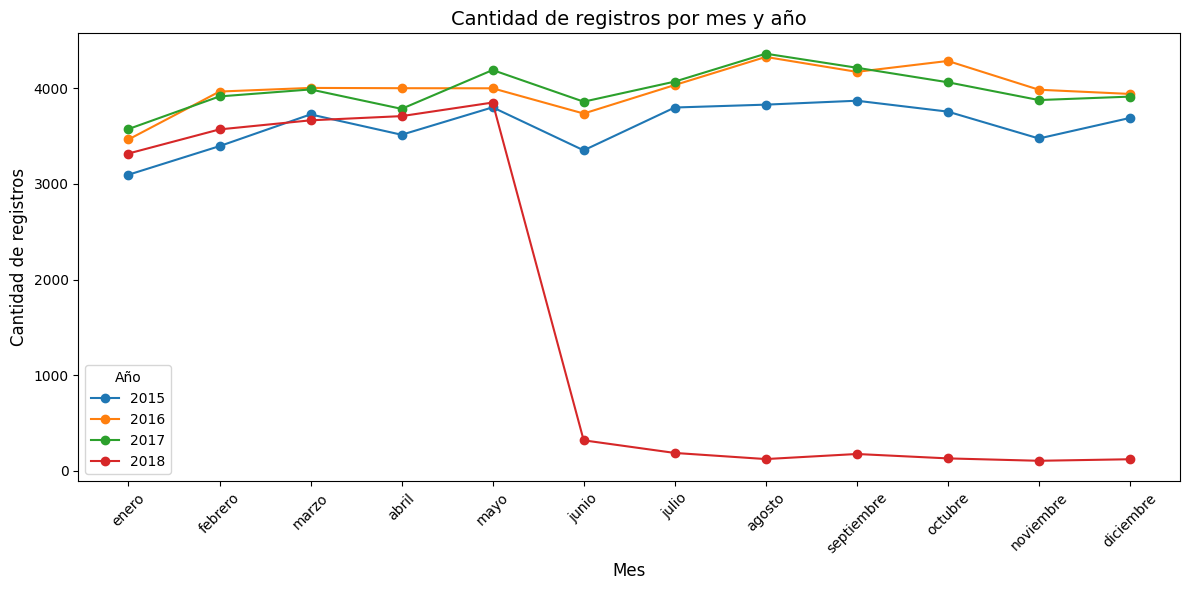

In [6]:
# Primero, asegurémonos de que 'MES' esté en el orden correcto
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

# Convertir la columna 'MES' en categorías con el orden de los meses
data['MES'] = pd.Categorical(data['MES'], categories=meses, ordered=True)

# Agrupar los datos por 'AÑO' y 'MES' y contar la cantidad de registros
data_grouped = data.groupby(['AÑO', 'MES']).size().unstack(fill_value=0)

# Graficar usando líneas en lugar de barras
plt.figure(figsize=(12, 6))

# Dibujar la curva para cada año
for año in data_grouped.index:
    plt.plot(data_grouped.columns, data_grouped.loc[año], marker='o', label=str(año))

# Títulos y etiquetas
plt.title('Cantidad de registros por mes y año', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Año')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [7]:
# eliminar datos "AÑO" == 2018
data = data[data["AÑO"] != 2018]

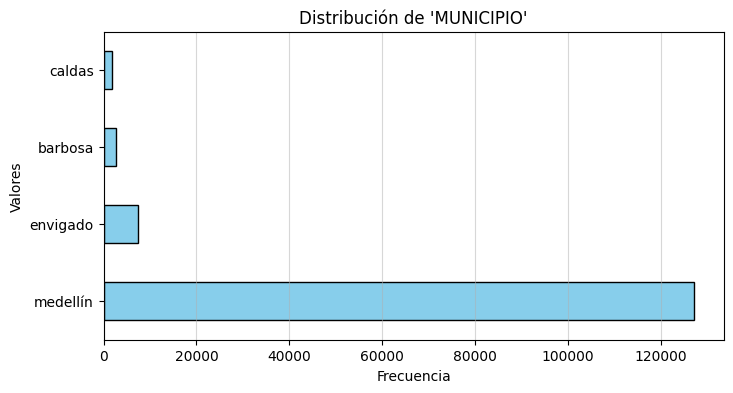

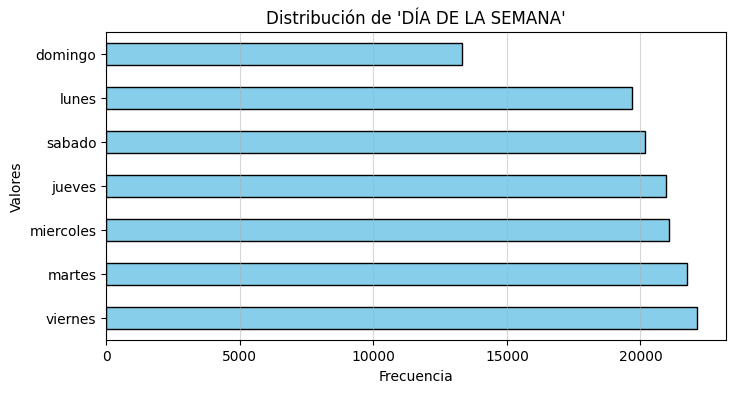

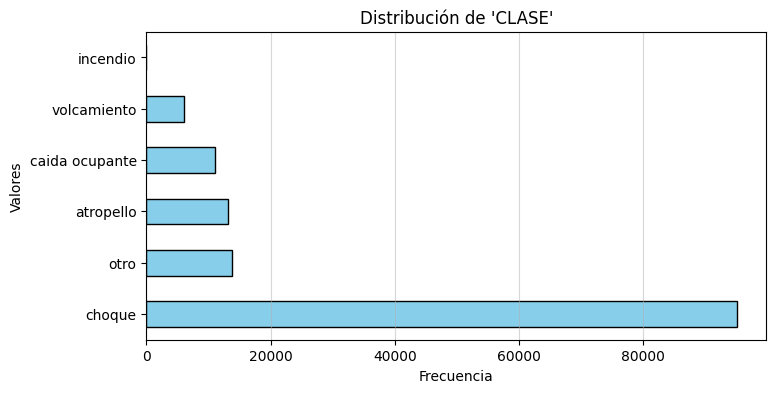

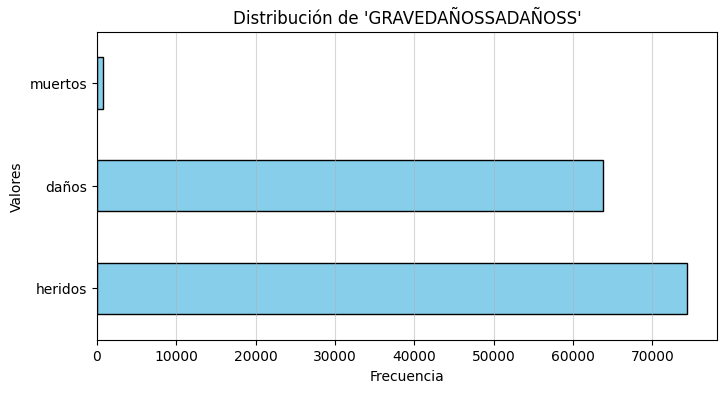

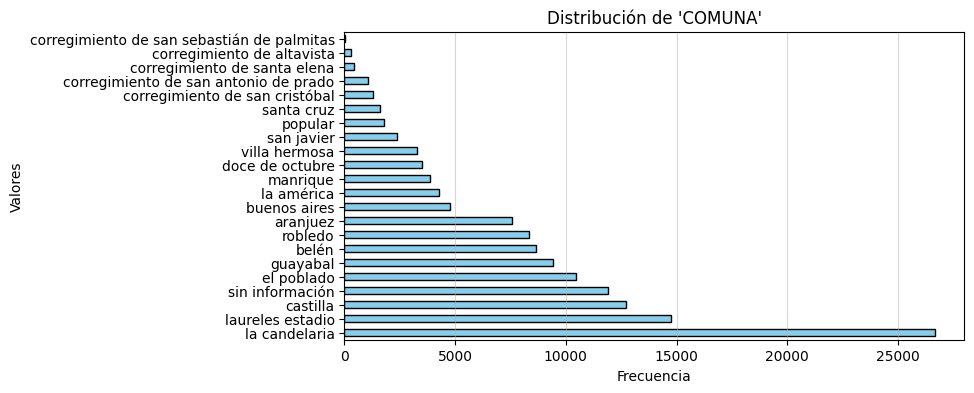

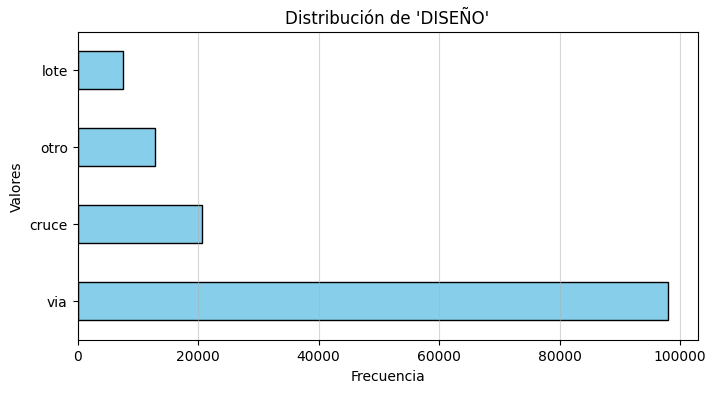

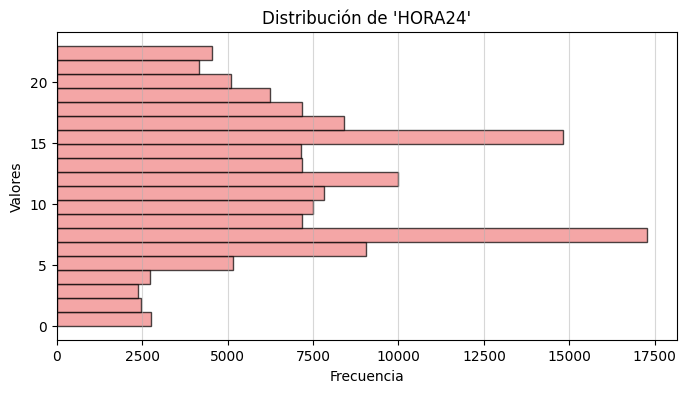

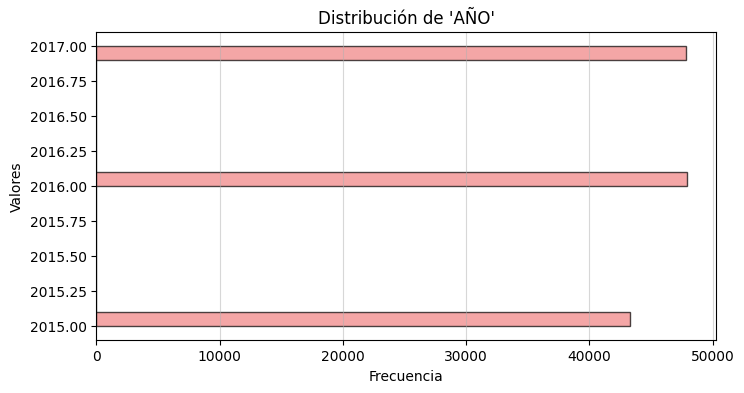

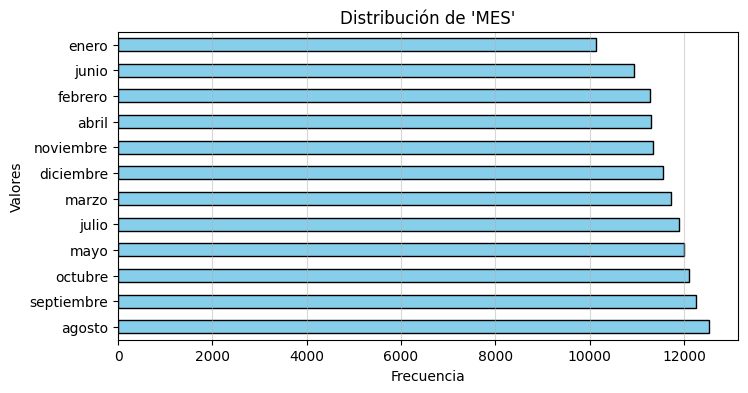

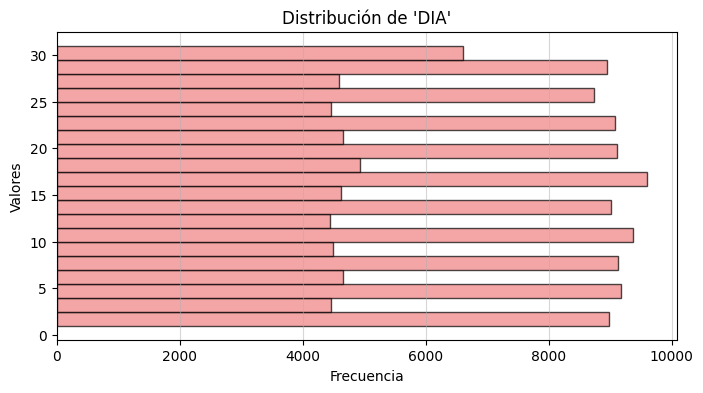

In [8]:
graficar_histogramas(data)

C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_4520\346754565.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  muertos = data[data["GRAVEDAÑOSSADAÑOSS"] == "muertos"].groupby("MES").size()
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_4520\346754565.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heridos = data[data["GRAVEDAÑOSSADAÑOSS"] == "heridos"].groupby("MES").size()
C:\Users\BRAYAN\AppData\Local\Temp\ipykernel_4520\346754565.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

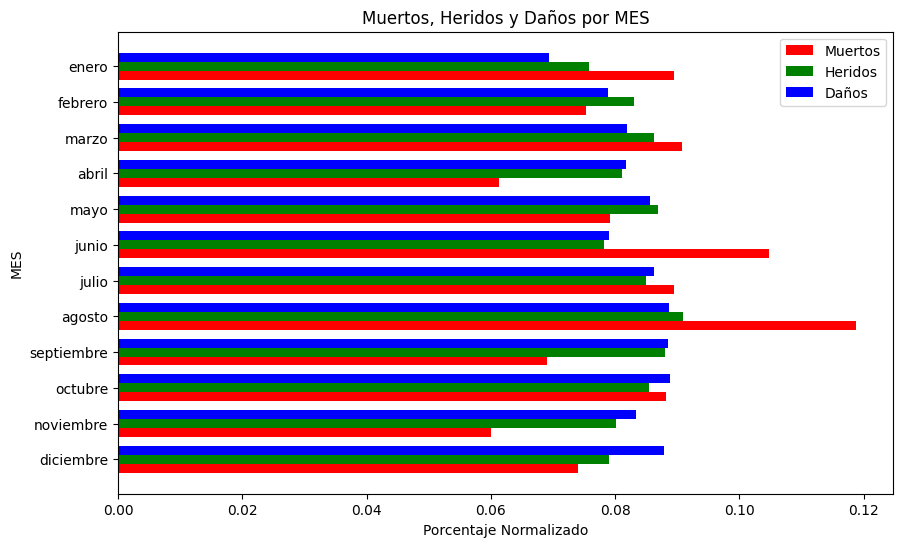

In [9]:
meses_ordenados = ["diciembre", "noviembre", "octubre", "septiembre", "agosto", "julio", "junio", "mayo", "abril", "marzo", "febrero", "enero"]

muertos = data[data["GRAVEDAÑOSSADAÑOSS"] == "muertos"].groupby("MES").size()
heridos = data[data["GRAVEDAÑOSSADAÑOSS"] == "heridos"].groupby("MES").size()
daños = data[data["GRAVEDAÑOSSADAÑOSS"] == "daños"].groupby("MES").size()
muertos = muertos[meses_ordenados]
heridos = heridos[meses_ordenados]
daños = daños[meses_ordenados]
muertos_heridos_daños(muertos, heridos, daños, "MES")

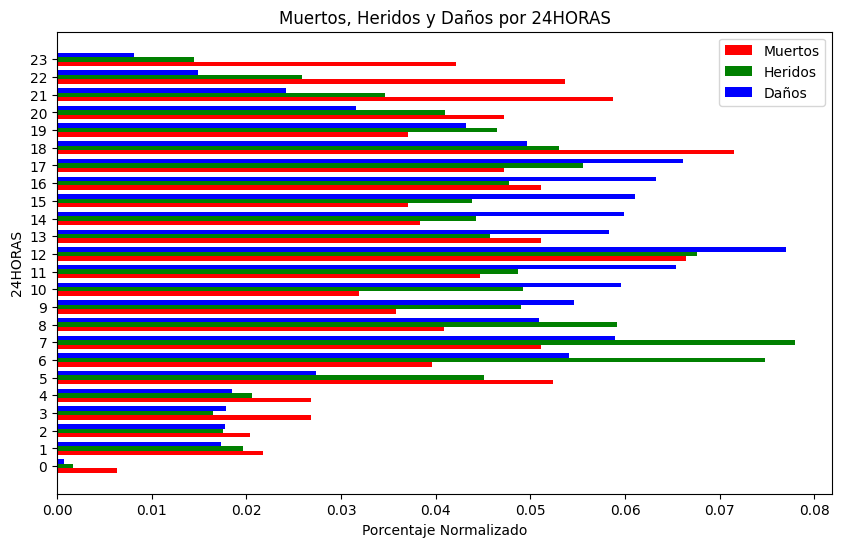

In [10]:
muertos = data[data["GRAVEDAÑOSSADAÑOSS"] == "muertos"].groupby("HORA24").size()
heridos = data[data["GRAVEDAÑOSSADAÑOSS"] == "heridos"].groupby("HORA24").size()
daños = data[data["GRAVEDAÑOSSADAÑOSS"] == "daños"].groupby("HORA24").size()

muertos_heridos_daños(muertos, heridos, daños, "24HORAS")

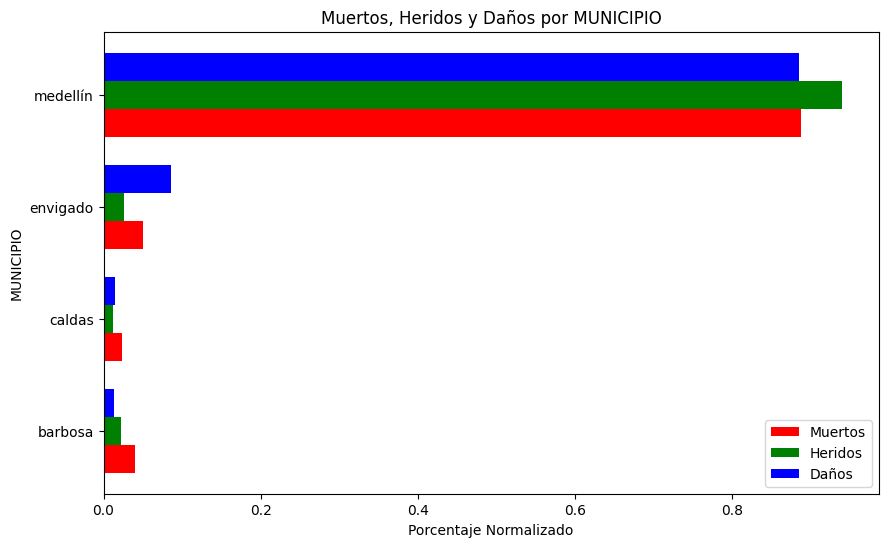

In [11]:
muertos = data[data["GRAVEDAÑOSSADAÑOSS"] == "muertos"].groupby("MUNICIPIO").size()
heridos = data[data["GRAVEDAÑOSSADAÑOSS"] == "heridos"].groupby("MUNICIPIO").size()
daños = data[data["GRAVEDAÑOSSADAÑOSS"] == "daños"].groupby("MUNICIPIO").size()

muertos_heridos_daños(muertos, heridos, daños, "MUNICIPIO")

In [12]:
agosto_grouped = data[data["MES"]=="agosto"].groupby(["AÑO", "DIA"]).size().reset_index(name="Cantidad de accidentes")
agosto_pivot = agosto_grouped.pivot_table(index="DIA", columns="AÑO", values="Cantidad de accidentes", fill_value=0)
agosto_pivot

AÑO,2015,2016,2017
DIA,,,
1,117.0,156.0,164.0
2,97.0,164.0,157.0
3,145.0,153.0,153.0
4,145.0,168.0,234.0
5,147.0,173.0,139.0
6,147.0,160.0,108.0
7,97.0,108.0,109.0
8,138.0,133.0,154.0
9,83.0,164.0,175.0


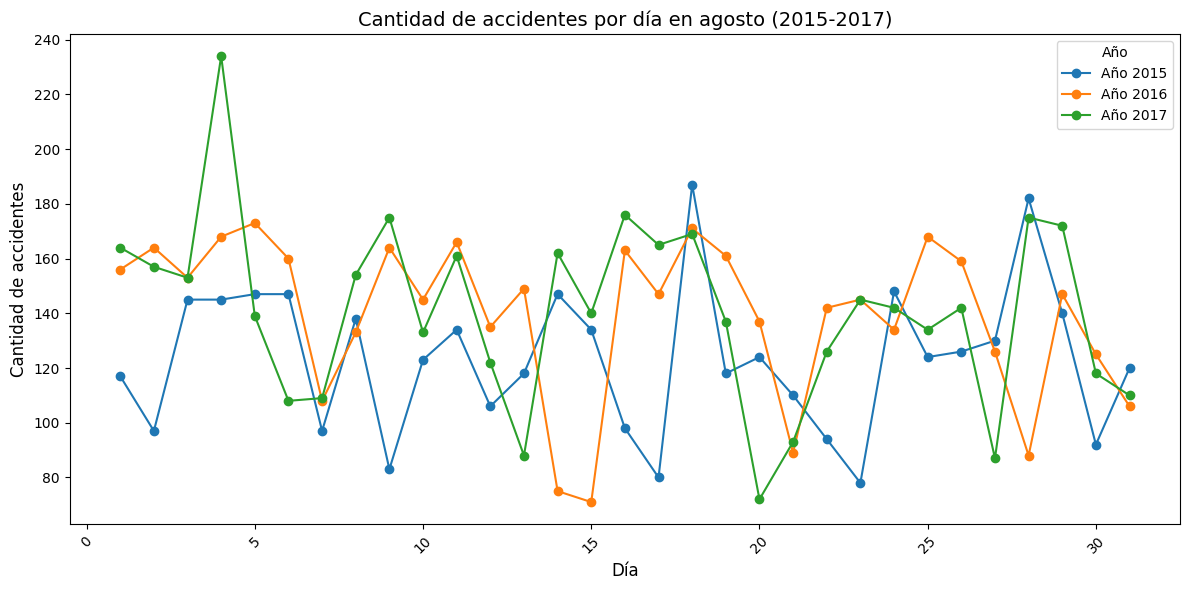

In [13]:

plt.figure(figsize=(12, 6))

# Graficar cada año como una línea
for column in agosto_pivot.columns:
    plt.plot(agosto_pivot.index, agosto_pivot[column], label=f'Año {column}', marker='o')

# Títulos y etiquetas
plt.title('Cantidad de accidentes por día en agosto (2015-2017)', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Cantidad de accidentes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Año')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [14]:
datos_medellin = data[data["MUNICIPIO"]=="medellín"]
datos_medellin = datos_medellin.drop(columns=['COD_MUNICIPIO', 'MUNICIPIO', 'FECHA', 'HORA'])
datos_medellin.to_csv("../files/input/data.csv", index=False)
